# Data Distribution

In this section, we present visualizations of the distributions for both the independent variables (features) and the target variable. These visualizations provide insights into the range, central tendencies, and variability of the dataset, helping to understand the underlying patterns and relationships within the data.

In [1]:
# import requiered libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the 'all_train.csv' file, to get a table of time resolution
all_train = pd.read_csv( '../../../data/interim/all_train.csv' ,  parse_dates = [0] ,  index_col = 0 )
all_train.head()

# NOTE: some entries in activity are really the same category. For example 'Walk' & 'Walking'
# Here, we convert those cases to the same category
conv_d = {
    'Walking':'Walk',
    'Running':'Run',
    'Weights':'Strength training'

}

all_train['activity'] = all_train['activity'].replace( conv_d )

## Distribution of all Features and the Target Variable


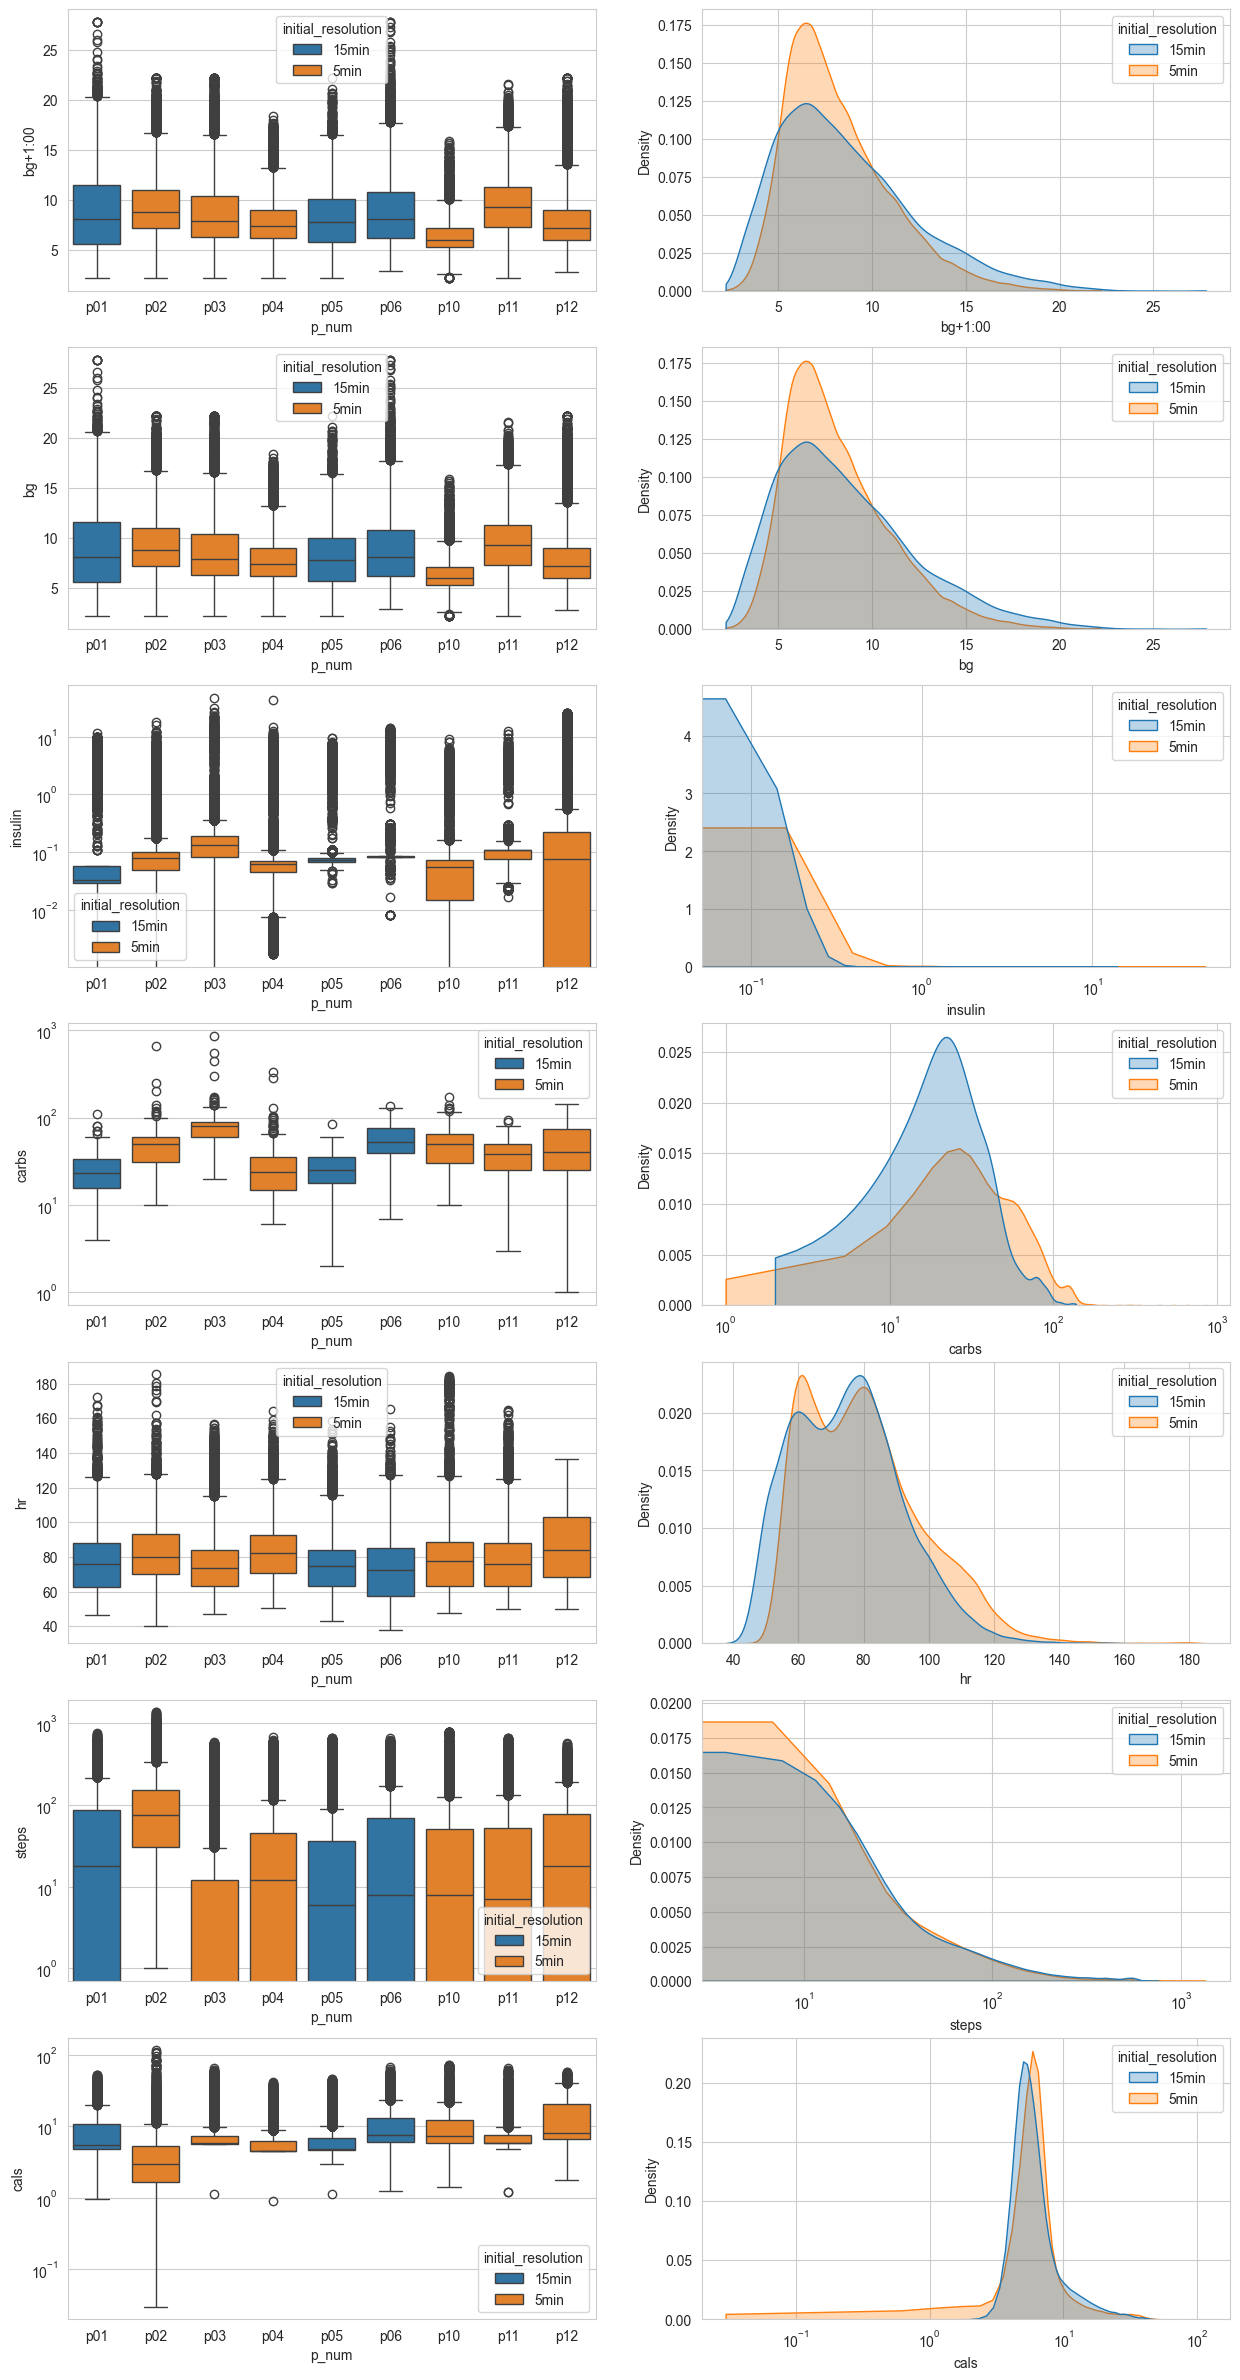

In [3]:
metrics_l = ['bg+1:00','bg','insulin','carbs','hr','steps','cals']

fig,ax = plt.subplots(7,2,figsize=(15,30))
ax_ix = 0

for metric in metrics_l:
    # print( metric )
    sns.boxplot( 
        data = all_train.reset_index() ,
        x = 'p_num' , 
        y = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 0 ] 
        )
    
    sns.kdeplot( 
        data = all_train.reset_index()  , 
        x = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 1 ] , 
        common_norm = False , 
        fill = True , 
        alpha = .3 ,
        cut = 0
        )
    
    if metric not in ['bg+1:00','bg','hr']:
        ax[ ax_ix , 0 ].set_yscale( 'log' )
        ax[ ax_ix , 1 ].set_xscale( 'log' )

    ax_ix += 1


## Global Activity Levels for Each Patient

The plot below illustrates the global activity levels across the entire dataset for each patient. It counts the number of times specific activities are logged for every patient, offering insights into individual activity patterns.

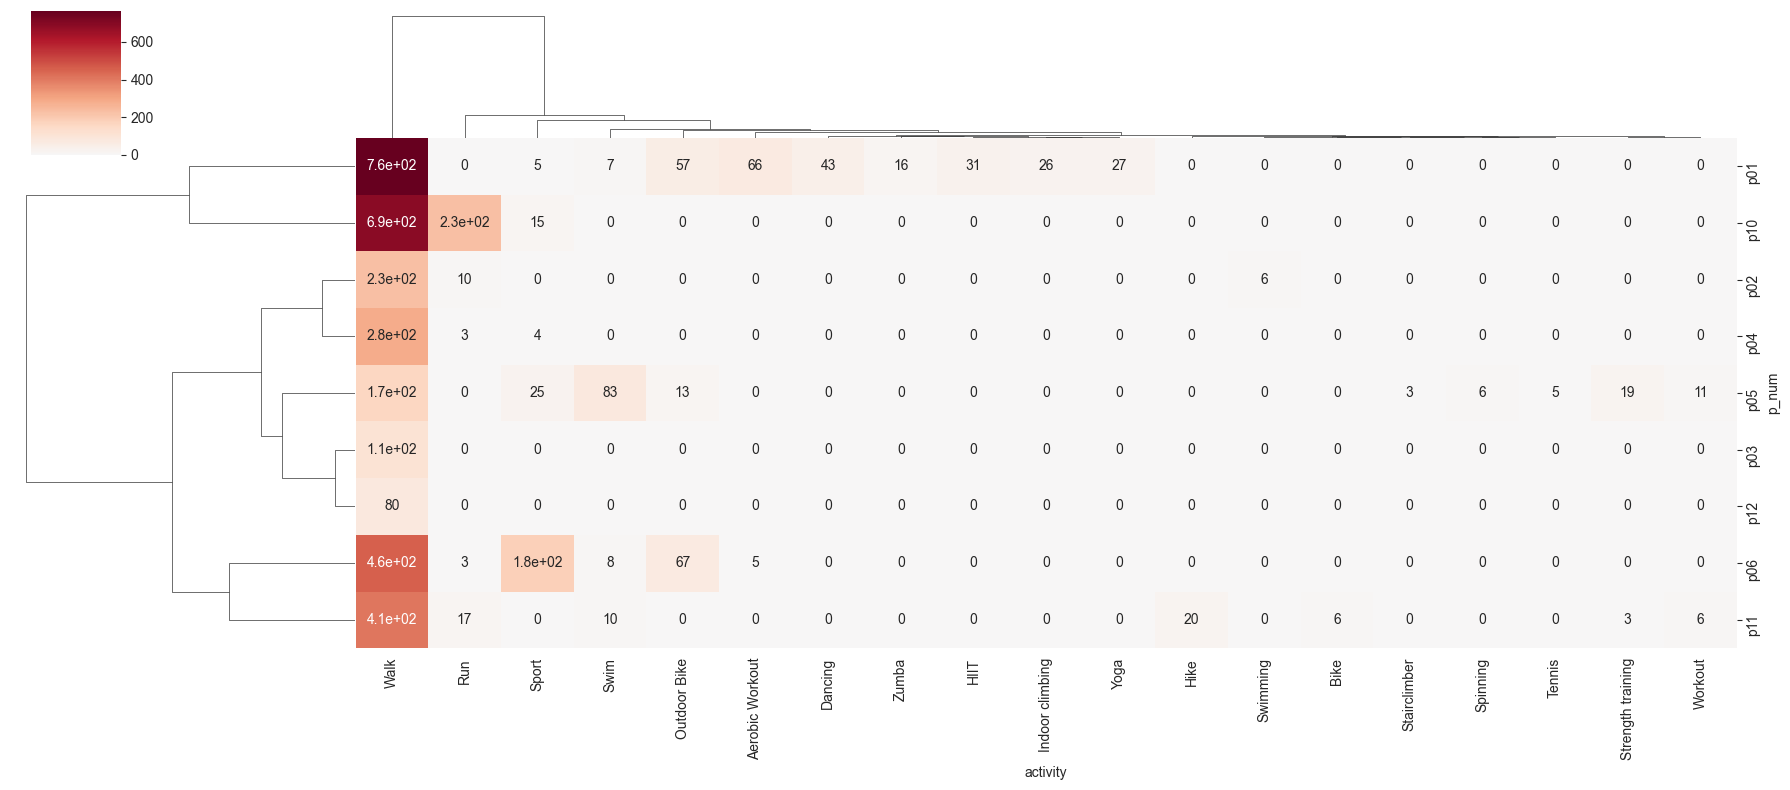

In [4]:
activity_df = pd.crosstab( all_train.p_num , all_train.activity )
sns.clustermap( activity_df , center = 0 , cmap = "RdBu_r" , annot = True , figsize=(18,8) );

## Summary

### Observations on Distributions

* Blood Glucose Levels (`bg` and `bg+1:00`):
    * There is variability across patients, but most distributions have a similar central tendency. Some patients, like `p12`, show more outliers and higher ranges, indicating irregular blood glucose patterns.
    * Both distributions are positively skewed, with more values clustered in lower ranges.
* Insulin and Carbs:
    * Both show right-skewed distributions with occasional outliers. For instance, patient `p03` shows higher carbohydrate consumption, which is reflected in increased insulin usage. 
* Heart Rate (hr):
    * The heart rate distributions are relatively consistent across patients, with slight variations in the median and range.
    * It follows a roughly normal distribution but is slightly right-skewed, with most values clustering between 60–100 beats per minute.
* Steps:
    * Steps show a large variability across patients, with some (e.g., `p03` and `p05`) displaying higher median activity levels and wider interquartile ranges. 
    * The data for both 5 min (orange) and 15 min (blue) resolutions are positively skewed, with most values clustering at lower ranges. The 5 min resolution shows finer granularity, with a smoother distribution.
* Calories Burned (cals):
    * The calorie distributions are more consistent across patients, with fewer outliers compared to steps. Patients like `p01` and `p02` show higher calorie expenditure, possibly reflecting more physical activity.
    * `cals` shows a similar trend across resolutions, with most values concentrated in lower ranges. The 5 min resolution captures more detailed variability compared to the broader trends seen in the 15 min resolution.
* Initial Resolution Comparison (5 min vs. 15 min): The 5 min resolution (orange) results in smoother and denser distributions, reflecting finer granularity in data collection. The 15 min resolution (blue) captures broader patterns but with less precision.

### Activity Distribution Across Patients
* The heatmap shows that the activities logged vary significantly among patients.
* Certain activities, such as "Walk," are common across multiple patients and have the highest logging frequency overall.
* Patients demonstrate distinct activity patterns. For instance, Patient ``p01`` shows high activity across various activities, while Patient ``p10`` is particularly active in running.

### Conclusion:
The analyzed features, including activity levels, blood glucose, insulin, and carbohydrate intake, show significant variability and skewed distributions across patients, with occasional spikes indicating irregularities of activity. Activity patterns are highly individualized, with some patients engaging in diverse activities while others specialize in specific ones. These differences, combined with finer granularity provided by the 5 min resolution, highlights the need for personalized analysis of the complex interplay between physical activity and glucose management.
